# Bank Term Depoisit Prediction

In this notebook we will be looking at bank term deposit prediction. We will build a machine learning model which will predict if the client will subscribe to term deposit. In AI terminology, this is a binary classification problem. 

## Phase 1 Identify and formulate the problem

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

Term deposits are popular with investors who prefer capital security and a set return as opposed to the fluctuations of, say, the share market. Many investors also use term deposits as a part of their investment mix.For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

**The dataset** is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.
Details can be found https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


Tools and Algorithms Used for Analysis


##Phase 2 Review literature, ethics, state-of-the-art (SOTA) algorithms and pretrained models

### Tools and Algorithms Used for Analysis
* Python
* Numpy
* Pandas
* shap
* Seaborn
* sklearn
* xgboost
* matplotlib
* Fit RandomForest Classifier
* Logistic regression
* Decision tree 
* K-nearest neighbour 
* XGBoost 
* Neural network - Multi-layer Perceptron

### References

1. Kaggle Datasets
2. UCI Machine Learning Repository

## Phase 3 Data preparation (SVOT)

### Setup Enviroment

In [1]:
# Shap explainability
!pip install shap

In [2]:
# The following two commands ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Libraries for data processing and manipulation
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import shap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

#import SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
# import joblib
import joblib

### Download datasets

I have hosted the datasets on a Google drive, I need to complete the familiar authentication step.  

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# These are the file IDs of the data sets

dataset_one_file_id ='1t_Afmfz9xwrJc-QkjXYF4Fmddc66r6QO'

# Download the file from Google Drive
downloaded = drive.CreateFile({'id':dataset_one_file_id})
downloaded.GetContentFile('bank-term-deposit.csv')


### Load dataset


###Input variables:
#### bank client data:
1.   age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16.  emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18.  cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

###Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')



In [4]:
# Read the data set to a pandas dataframe
df_bank_term_deposit = pd.read_csv("bank-term-deposit.csv")
# extract the top 3 rows of the dataframe
df_bank_term_deposit.head(3)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# find out the dimensionality of the dataframe i.e. (rows, columns) 
df_bank_term_deposit.shape

(41188, 21)

In [6]:
# Columns
df_bank_term_deposit.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
# Check Missing Values
df_bank_term_deposit.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# Check data types
df_bank_term_deposit.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Phase 4 Data Exploration

#### Target variable

Visualise the distribution of the target variable i.e. *y* 

In [9]:
df_bank_term_deposit['y'].value_counts(normalize=True) * 100

no     88.734583
yes    11.265417
Name: y, dtype: float64

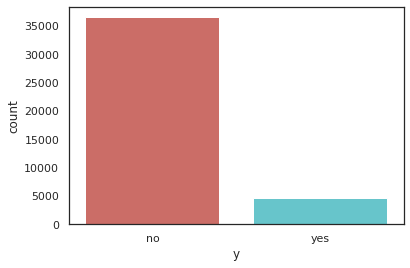

In [10]:
sns.countplot(x='y',data=df_bank_term_deposit, palette='hls')
plt.show()


Our dataset are imbalanced, and the ratio of term deposit not taken to term deposit taken instances is 89:11. Before we go ahead to balance the dataset, Let's do some more exploration.

#### Analysis of Numerical Inputs

For numerical input variables age,duration, campaign, pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m and nr.employed, let's plot the probability density distribution for some indications of term deposit taken and not-taken. Think of the kdeplot as a histogram for continuous numerical values. 

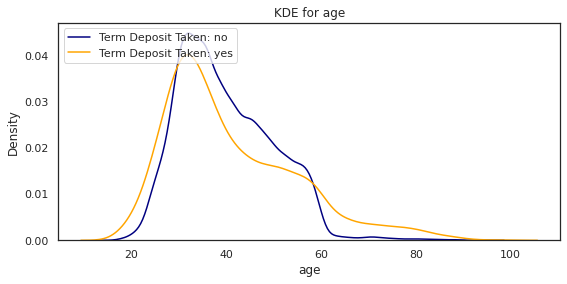

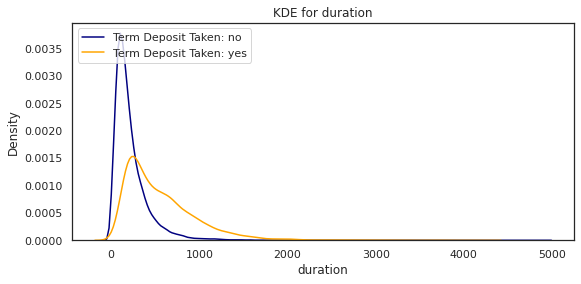

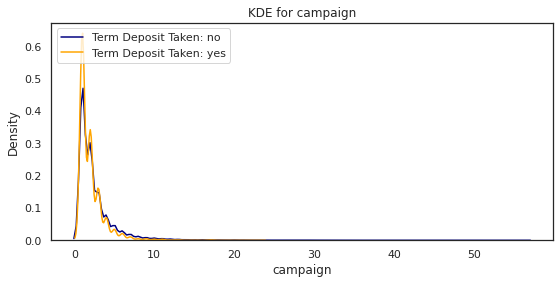

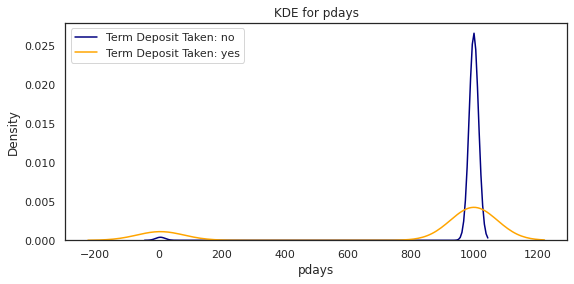

In [ ]:
# here we create a function as we have to plot graphs in the same format. 
def kdeplot(features):
    for feature in features:
      plt.figure(figsize=(9, 4))
      plt.title("KDE for {}".format(feature))
      ax0 = sns.kdeplot(df_bank_term_deposit[df_bank_term_deposit['y'] == 'no'][feature].dropna(), color= 'navy', label= 'Term Deposit Taken: no')
      ax1 = sns.kdeplot(df_bank_term_deposit[df_bank_term_deposit['y'] == 'yes'][feature].dropna(), color= 'orange', label= 'Term Deposit Taken: yes')
      plt.legend(loc="upper left")

columns = ['age', 'duration', 'campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
kdeplot(columns)

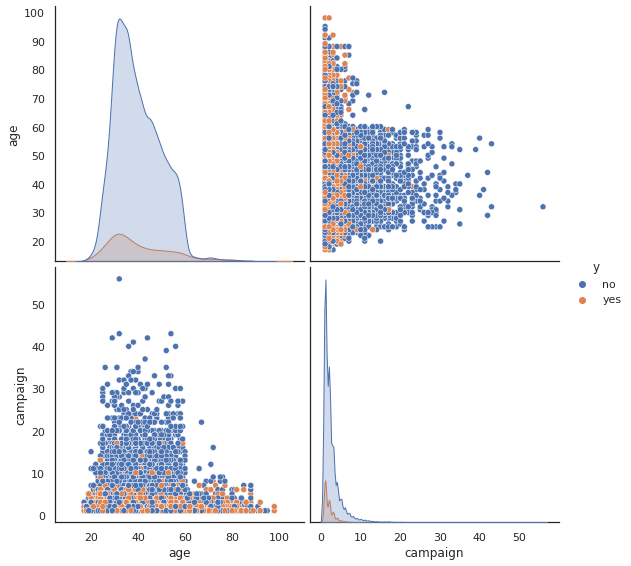

In [11]:
sns.pairplot(df_bank_term_deposit[['y', 'age', 'campaign']], hue="y", height=4)

What are our preliminary insights? 

* Age - The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
* pdays -The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
* campaigns  - campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.
* Duration - Duration of the call (which highly
affects the probability of a successful contact

#### Analysis of Categorical Inputs



In [12]:
df_bank_term_deposit.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [13]:
df_bank_term_deposit.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [14]:
df_bank_term_deposit.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


In [15]:

df_bank_term_deposit.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


Visualizations

Text(0, 0.5, 'Frequency of Term Deposit Taken')

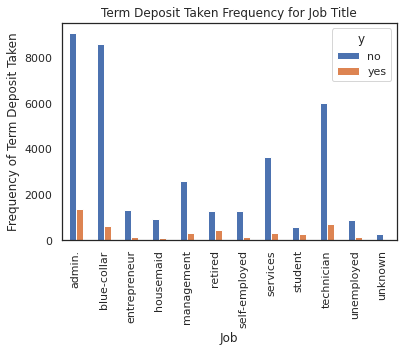

In [16]:
%matplotlib inline
pd.crosstab(df_bank_term_deposit.job,df_bank_term_deposit.y).plot(kind='bar')
plt.title('Term Deposit Taken Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Term Deposit Taken')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

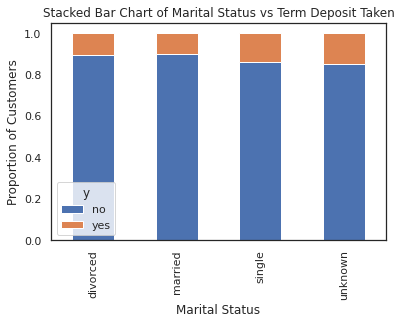

In [17]:
table=pd.crosstab(df_bank_term_deposit.marital,df_bank_term_deposit.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Term Deposit Taken')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable

Text(0, 0.5, 'Proportion of Customers')

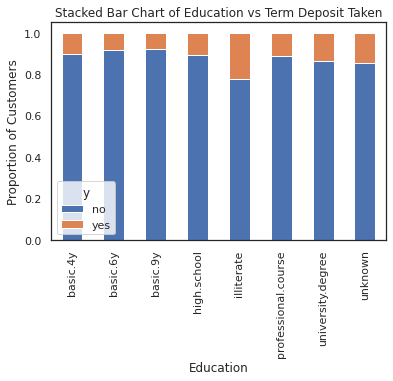

In [18]:
table=pd.crosstab(df_bank_term_deposit.education,df_bank_term_deposit.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Term Deposit Taken')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Term Deposit Taken')

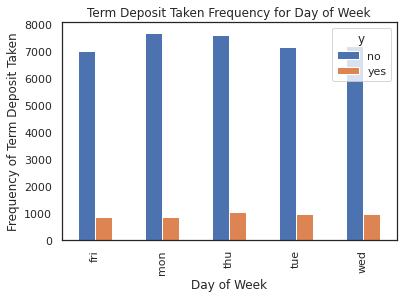

In [19]:
pd.crosstab(df_bank_term_deposit.day_of_week,df_bank_term_deposit.y).plot(kind='bar')
plt.title('Term Deposit Taken Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Term Deposit Taken')

Text(0, 0.5, 'Frequency of Term Deposit Taken')

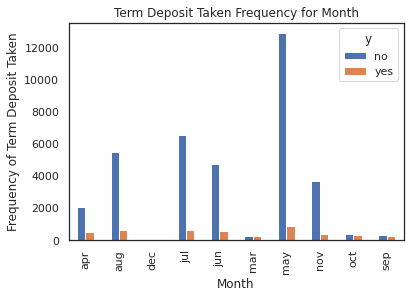

In [20]:

pd.crosstab(df_bank_term_deposit.month,df_bank_term_deposit.y).plot(kind='bar')
plt.title('Term Deposit Taken Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Term Deposit Taken')

Month might be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

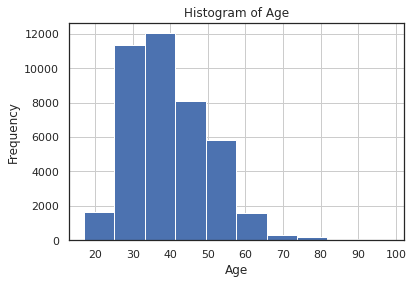

In [21]:
df_bank_term_deposit.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Most customers of the bank in this dataset are in the age range of 30-40.

Text(0, 0.5, 'Frequency of Term Deposit Taken')

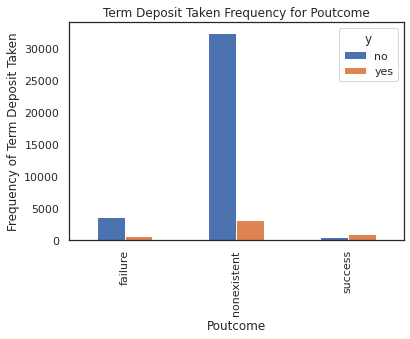

In [22]:
pd.crosstab(df_bank_term_deposit.poutcome,df_bank_term_deposit.y).plot(kind='bar')
plt.title('Term Deposit Taken Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Term Deposit Taken')

Poutcome seems to be a good predictor of the outcome variable.

In [23]:
def plot_categorical_features(features, title):
  fig, axs = plt.subplots(ncols=2,
                          nrows=int(len(features) / 2) + len(features) % 2)
  fig.set_size_inches(20, 10)

  row = col = 0

  for feature in features:
    plot_title = '{} - {}'.format(title, feature)
    sns.countplot(x=feature, hue="y", data=df_bank_term_deposit, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  plt.tight_layout()

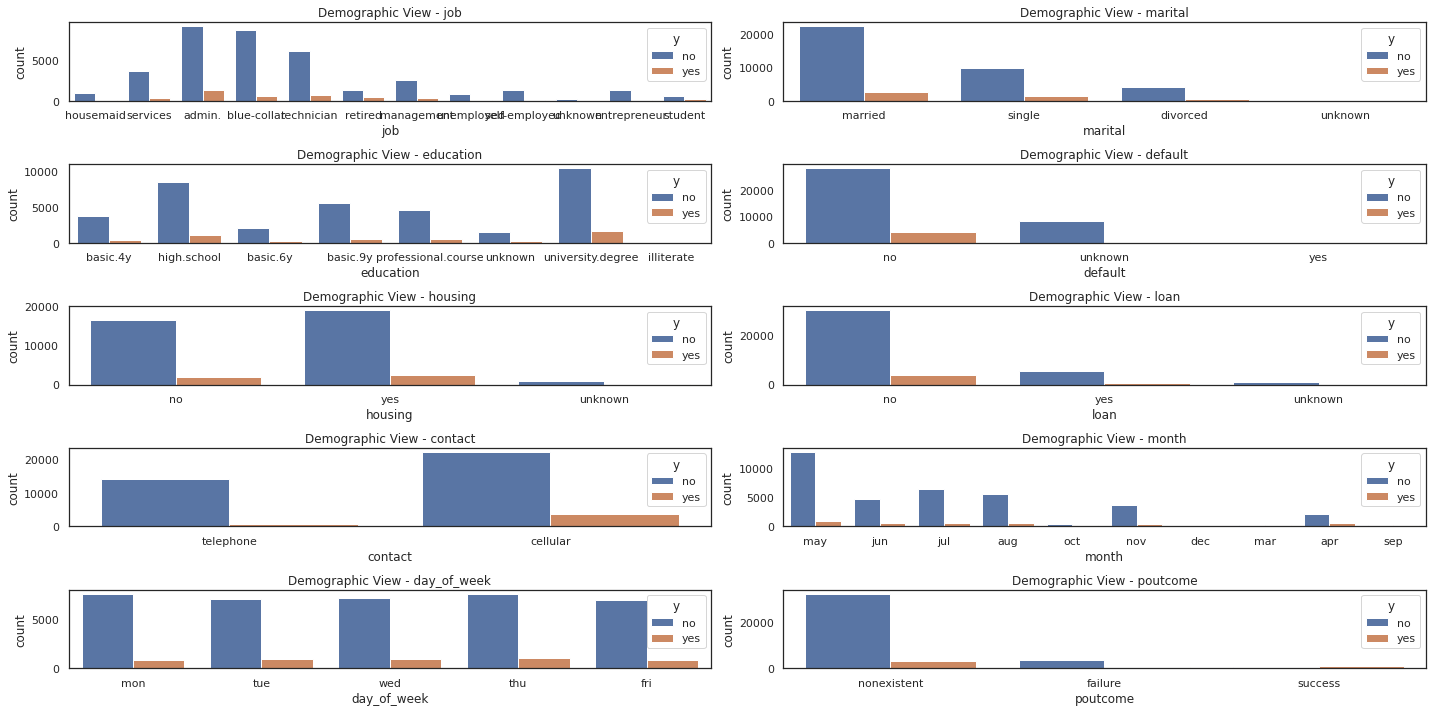

In [24]:
plot_categorical_features(['job', 'marital', 'education', 'default','housing','loan','contact','month','day_of_week','poutcome'], 'Demographic View')

### Correlation between features

Correlation graph provides overview of feature correlation which is useful to get more insights of feature dependencies. We have replace all categorical variables before plotting the correlation matrix.

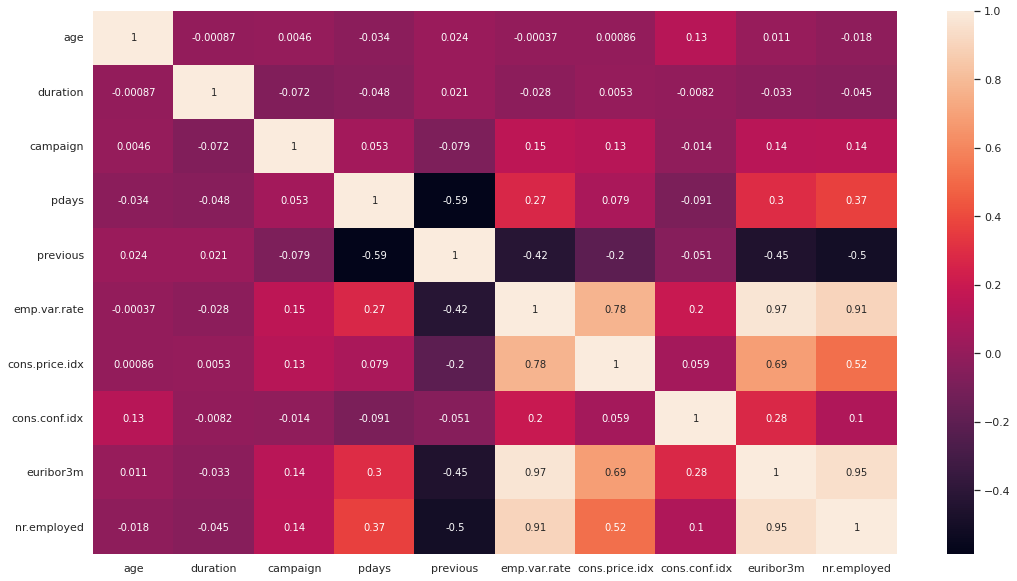

In [25]:
plt.figure(figsize = (18,10))
corr_matrix = df_bank_term_deposit.corr()
sns.heatmap(corr_matrix, data = df_bank_term_deposit, annot=True)

Based on above visualizations

* The job title can be a good predictor of the outcome variable
* Education seems a good predictor of the outcome variable.
* Day of week may not be a good predictor of the outcome.
* Most customers of the bank in this dataset are in the age range of 30-40.
* Poutcome seems to be a good predictor of the outcome variable.

## Phase 5 External/strategic data acquisition
Long term - Can collect the dataset from the primary stakeholders.

Short time - Can collect dataset from the data brokers and vendors or search in the internet

UCI Machine Learning Repository contians about 588 data sets which can be used


## Phase 6 Data preprocessing

We will use one label encoding to handle categorical features.
*   Category
*   Get Dummies
*   LabelEncoder  


####Category

In [26]:
# Get All Columns that are object
df_bank_term_deposit.columns[df_bank_term_deposit.dtypes == 'object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

#### Get Dummies

In [27]:
#Using Get Dummies
pd.get_dummies(df_bank_term_deposit,df_bank_term_deposit.columns[df_bank_term_deposit.dtypes == 'object'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [28]:
# Check For Unique Values of Each Column
for i in df_bank_term_deposit.columns[df_bank_term_deposit.dtypes == 'object']:
    print(i,"::",df_bank_term_deposit[i].unique())

job :: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital :: ['married' 'single' 'divorced' 'unknown']
education :: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default :: ['no' 'unknown' 'yes']
housing :: ['no' 'yes' 'unknown']
loan :: ['no' 'yes' 'unknown']
contact :: ['telephone' 'cellular']
month :: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week :: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome :: ['nonexistent' 'failure' 'success']
y :: ['no' 'yes']


#### Label Encoder
We will use one label encoding to handle categorical features which are based on strings.

In [29]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df_bank_term_deposit.apply(lambda x: object_to_int(x))
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [30]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [31]:
drop = ['duration', 'y']
X, y = df.drop(drop, axis=1, errors='ignore'), df['y']
#X, y = df, df['y']
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


## Phase 7 Data augmentation

### Over-sampling using **SMOTE**

In [32]:

#drop = ['duration', 'y']
#X, y = df.drop(drop, axis=1, errors='ignore'), df['y']
#X, y = df, df['y']
#X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 25645, 1: 3186})
After Counter({0: 25645, 1: 25645})


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

## Phase 8 Prototype an AI model

### Creating training and testing datasets

In [33]:
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

### Building the models

We will use a Logistic regression classifier to build a simple machine learning model to predict the term deposit taken.

In [34]:
#Logistic regression 
termLogReg = LogisticRegression()
# fit the model on the training data
termLogReg.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Phase 9 Develop a benchmark

The associated research article (also on LMS) reports an AUC of 0.8, this is the benchmark



In [35]:
tlr_probs = termLogReg.predict_proba(X_test)
tlr_probs = tlr_probs[:, 1]
# calculate accuracy metrices for Logistic regression 
tlr_auc = roc_auc_score(y_test, tlr_probs)
print('Accuracy=%.3f' % (accuracy_score(y_test, termLogReg.predict(X_test))))
print('ROC AUC=%.3f' % (tlr_auc))
print('F1 Score=%.3f' % (f1_score(y_test, termLogReg.predict(X_test))))


Accuracy=0.895
ROC AUC=0.760
F1 Score=0.295


The Logistic regression AUC score is 0.76 which is lower then the benchmark and we are going to build other models.

## Phase 10 Build several models

Next will try to use the below Classfier
 * RandomForest Classifier
 * Decision tree 
 * K-nearest neighbour
 * XGBoost
 * Neural network - Multi-layer Perceptron

In [36]:
# Fit RandomForest Classifier
rfTerm = RandomForestClassifier()
rfTerm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
#Logistic regression 
termLogReg = LogisticRegression()
# fit the model on the training data
termLogReg.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#Decision tree 
termDecisionTree = tree.DecisionTreeClassifier()
termDecisionTree.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
# K-nearest neighbour 
termKNN = neighbors.KNeighborsClassifier()
termKNN.fit(X_train_sm,y_train_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
# XGBoost 
termXGB = xgb.XGBClassifier()
termXGB.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
# Neural network - Multi-layer Perceptron
termMLP = MLPClassifier()
termMLP.fit(X_train_sm,y_train_sm)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Phase 11 Validate all the models

### Model Evaluation

In [42]:
classifiers = [ termMLP, termXGB, termKNN, termDecisionTree, termLogReg]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )

print(evalTable)

+------------------------+----------+----------+---------------+----------+
|          Name          | Accuracy | F1-score | ROC AUC score | AP score |
+------------------------+----------+----------+---------------+----------+
|     MLPClassifier      |  0.882   |   0.0    |     0.767     |  0.399   |
|     XGBClassifier      |  0.896   |  0.345   |     0.802     |  0.481   |
|  KNeighborsClassifier  |  0.884   |  0.342   |     0.717     |  0.302   |
| DecisionTreeClassifier |   0.84   |  0.339   |      0.63     |  0.194   |
|   LogisticRegression   |  0.895   |  0.295   |      0.76     |   0.42   |
+------------------------+----------+----------+---------------+----------+


XGBClassifier model has the highest AUC Socre.

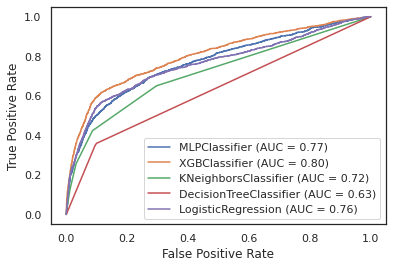

In [43]:
# All ROC curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=all_axes)

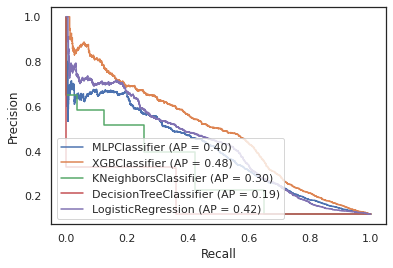

In [44]:
# All precision-recall curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_precision_recall_curve(i, X_test, y_test, ax=all_axes)

## Phase 12 Validate secondary metrics




This notebook is running using Chrome browser and the below are the RAM and Disk Usage. RAM is low and Disk is a little bit high.
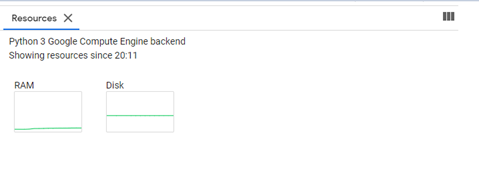


IF I change the hardware accelerate type to GPU, RAM is still low and Disk is higher then without the GPU accelerator.

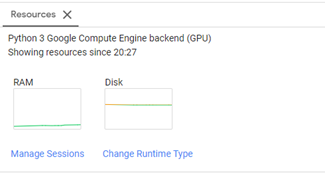

## Phase 13 Develop and improve model explainability

### Model Explainability



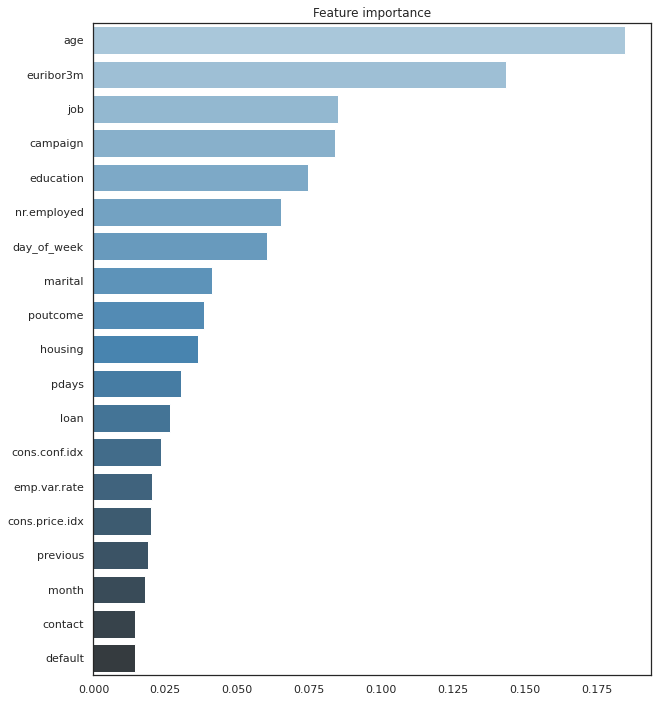

In [45]:
# Plot features importances
imp = pd.Series(data=rfTerm.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

Top 3 features are age,euribor 3 month rate and job.

#### Summary plots
Summary plot of SHAP values indicate how each feature is important towards the target prediction.

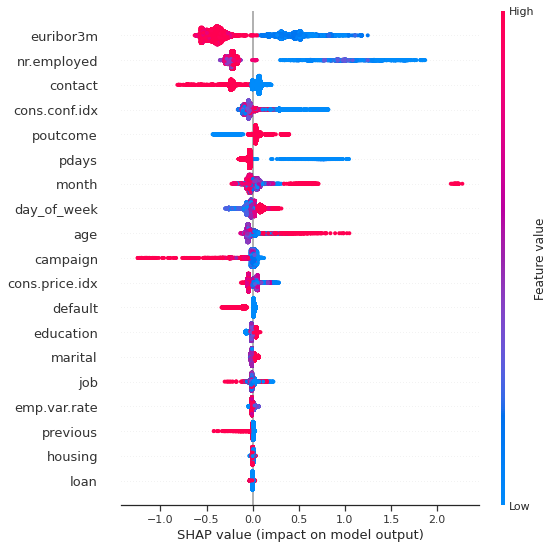

In [46]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(termXGB)

# Calculate Shap values
shap_values = explainer.shap_values(X_train_sm)

shap.summary_plot(shap_values, X_train_sm)

Some features like campaign, euriborn3m, contact have the high negative impact on the prediction. Age has the highest postivie impact on the prediciton

#### Individual force plots

The individual force plot indicate how SHAP values impact for each of the prediction. Here we are selecting the first row which is the first day of the dataset to analyze how each feature impact towards the target prediction.


In [47]:
# print the JS visualization code to the notebook
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[3,:], X_train_sm.iloc[2,:])

In [48]:
print("Row values")
print(X_train_sm.iloc[2,:])
print("Actual Value")
print(y_train_sm.iloc[2])
print("Mean values")
X_train.mean()

Row values
age                 36.000
job                  9.000
marital              1.000
education            3.000
default              0.000
housing              0.000
loan                 0.000
contact              0.000
month                7.000
day_of_week          3.000
campaign             2.000
pdays              999.000
previous             1.000
poutcome             0.000
emp.var.rate        -0.100
cons.price.idx      93.200
cons.conf.idx      -42.000
euribor3m            4.153
nr.employed       5195.800
Name: 24943, dtype: float64
Actual Value
0
Mean values


age                 40.026256
job                  3.739516
marital              1.172523
education            3.748639
default              0.207936
housing              1.070098
loan                 0.327356
contact              0.365926
month                4.222330
day_of_week          2.002046
campaign             2.574486
pdays              962.289029
previous             0.170095
poutcome             0.932087
emp.var.rate         0.087583
cons.price.idx      93.578323
cons.conf.idx      -40.492581
euribor3m            3.625958
nr.employed       5167.185183
dtype: float64

#### Decision Plot

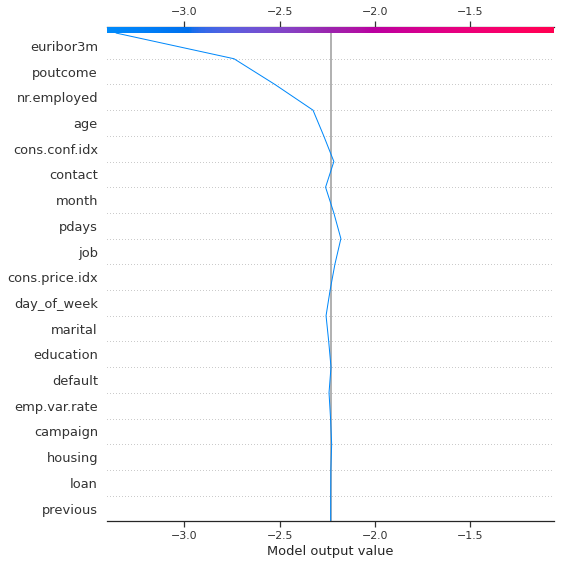

In [49]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X_train_sm.iloc[2,:]),
                   feature_names=X_train_sm.columns.tolist()
                   )

In [50]:
y_train_sm[0:10]

10944    0
21196    0
24943    0
420      0
34036    0
10459    0
23174    0
41050    1
14677    0
40113    0
Name: y, dtype: int64

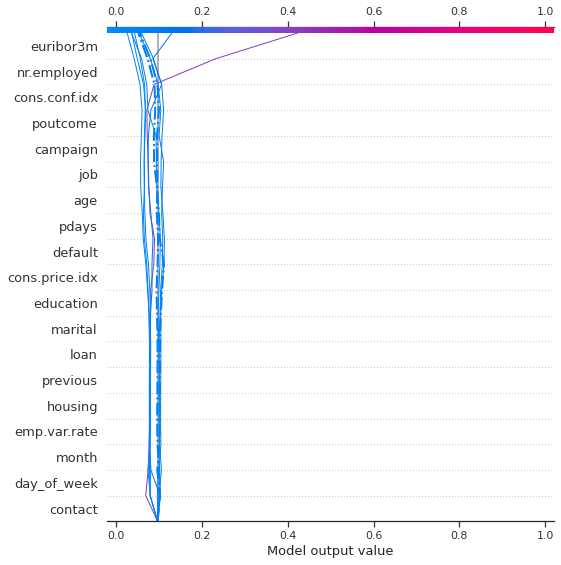

In [51]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X_test.iloc[0:10,:]),
                   feature_names=X_train_sm.columns.tolist(),
                    highlight=[2,5],
                    feature_order='hclust',
                   link='logit'
                   )

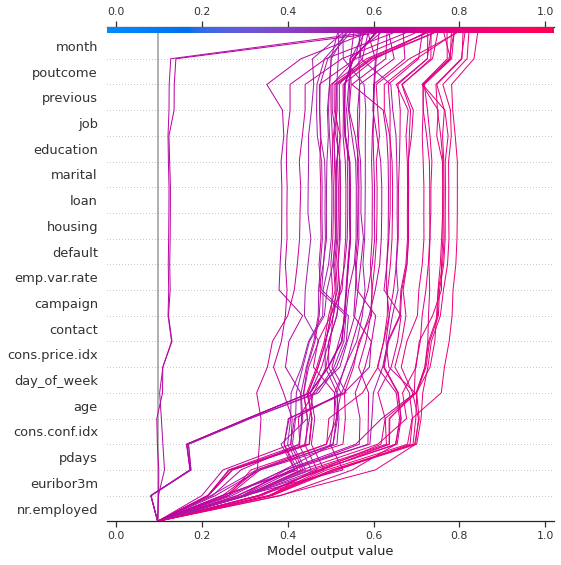

In [52]:
y_pred = termXGB.predict(X_test)
#T = X_test[(X_test['job'] == 1) & (X_test['age'] == 60) & (X_test['education'] == 2) & (y_pred == 1)]
T = X_test[(X_test['marital'] == 0) & (X_test['loan'] == 0) & (X_test['default'] == 0) & (y_pred == 1)]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh = explainer.shap_values(T)
shap.decision_plot(explainer.expected_value, sh, T, feature_order='hclust', link='logit') 

#### Dependence plots
The partial dependence plot shows the marginal effect of one or two variables towards the predicted outcome. It indicate the relationship between the target and the variable whether its linear, monotonic, or more complex.

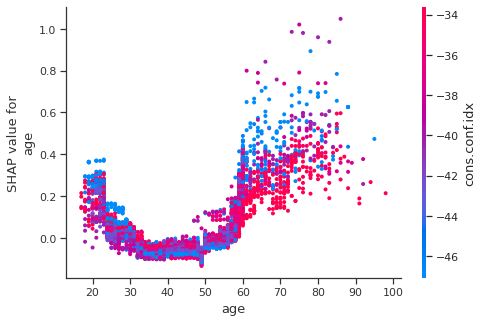

In [53]:
shap.dependence_plot("age", shap_values, X_train_sm)

#### Collective force plot

The collective force plot shows show all the features that contribute toward the target prediction. This is the individual force plot stacked vertically across all the data points.

In [54]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_train_sm.iloc[:1000,:])

## Phase 14 Deploy models

After experimenting with a range of models built on historic training data, the next stage of the AI lifecycle is to deploy a chosen model to score new, unseen records.

The best practice is to deploy models of a specific type (AutoML text, AutoML tabular, custom-trained, etc.) to an endpoint. This configuration is easier to manage.

For this model, we could deploy the model into on-premises environment. We also colud deploy the model into cloud, at the edge. 

We also need to remember to continuously measure and monitor the model perfomrance.We aslo need to keep iterating the model to improve model performance with the changing data




## Phase 15 Operationalise using AI pipelines
We have developed and tested AI models and we needs to deploy this model as pipelines for practical applications.

In the recent past, AI models were hosted as APIs accessible from the web for both browserbased
and mobile-based applications. With the introduction of containers, microservices,
Docker and Kubernetes technologies we can extend this beyond APIs.


#### 1. Building a Classifier

In [55]:
#Saving the machine learning model to a file
joblib.dump(termXGB, "rf_model.pkl")

['rf_model.pkl']

#### 2. Creating an HTTP REST API

In [56]:
from flask import Flask, jsonify, request

app = Flask(__name__)

@app.route("/predict", methods=['POST'])
def do_prediction():
  json = request.get_json()
  model = joblib.load('rf_model.pkl')
  df_request = pd.DataFrame(json, index=[0])
  def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

  df = df_request.apply(lambda x: object_to_int(x))
  

  drop = ['y', 'duration']
  df = df.drop(drop, axis=1, errors='ignore')
  feature_term = model.get_booster().feature_names
  df_predict = hr_df[feature_term]
  y_predict = model.predict(df_predict)
  if y_predict[0] == 1:
    result = {"Predicted Term Deposit Taken": "Yes"}
  else:
    result = {"Predicted Term Deposit Taken": "No"}
  return jsonify(result)
#if __name__ == "__main__":
  #app.run(host='127.0.0.1', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


#### 3. Creating the docker container
FROM python:3.7
WORKDIR /app
RUN pip install pandas scikit-learn flask gunicorn xgboost
ADD ./models ./models
ADD server.py server.py
EXPOSE 5000
CMD [ "gunicorn", "--bind", "127.0.0.1:5000", "main:app" ]

#### 4. Building the Docker image
docker build -t term-ml-model

#### 5. Tagging the Docker Image

docker tag term-ml-model tinatang/term-ml-model:v1.0.0

#### 6. Pushing the docker image to a docker repository

docker push tinatang/term-ml-model:v1.0.0

#### 7. Pulling the docker image from a docker repository

docker pull tinatang/term-ml-model:v1.0.0

#### 8. Run the docker container
docker run term-ml-model:v1.0.0


### 9. Deploying in Katacoda Docker Playground

Below are the overview about how to deploy in Katacoda  Docker Playground

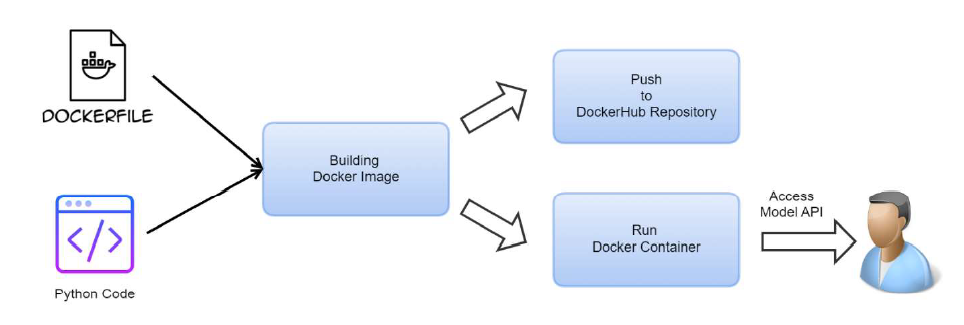

## Phase 16 Evaluate and monitor results

Model drift occurs when the accuracy of predictions produced from new input values “drifts” from the performance during the training period.

Model staleness which refers to the predictive power of an ML model decreasing over time, as trends or tastes change. IT can be addressed create the new model.

For example, if there is a new job type needs to be added to the data set, then model drift happens and we need to re-train the model.

IF more features needs to be added to this Term Deposit Taken Prediction model, for example Interest rate (National monthly average of deposit interest rate). Then the model staleness happen and hence we need to re-create the model to add this new feature. 


## Conclusion

This binary classfication refers to those classification tasks that have two class labels. 

I can think about two examples at work 
1. Email Spam dection (spam or not)
2. Convsersion Prediction like telemaketing call to predict whehter customer would like to buy the new product/plan or not.


